## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os as _dir
import numpy as np

#gets the working directory and opens both csv files to a variable
working_dir = _dir.getcwd()
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

for root, dirs, files in _dir.walk(working_dir):
    if mouse_metadata_path in files:
        mouse_metadata_path = (_dir.path.join(root, mouse_metadata_path))
    if study_results_path in files:
        study_results_path = (_dir.path.join(root, study_results_path)) 
        
mouse_Metadata_df = pd.read_csv(mouse_metadata_path)
study_Results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_Results_df, mouse_Metadata_df, on="Mouse ID", how="left"  )
# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice.
mice_count= len(merged_df["Mouse ID"].unique())
mice_count

249

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_Mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_Mice


array(['g989'], dtype=object)

In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df["Mouse ID"].isin(duplicated_Mice)== False]
cleaned_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [78]:
# Checking the number of mice in the clean DataFrame.
Clean_count = len(cleaned_df["Mouse ID"].unique())
Clean_count

248

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = cleaned_df.loc[:,["Mouse ID", "Drug Regimen" , "Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_Mean = summary_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
summary_Median = summary_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
summary_Variance = summary_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
summary_Standard_Deviation = summary_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
summary_SEM = summary_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.
summary_final_df = pd.DataFrame({
                                 "Mean of Tumor Volume": summary_Mean,
                                 "Median of Tumor Volume": summary_Median,
                                 "Variance of Tumor Volume": summary_Variance,
                                 "Standard Deviation of Tumor Volume": summary_Standard_Deviation,
                                 "SEM of Tumor Volume": summary_SEM,
                                 })



In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_final_df=summary_final_df.round(2)
summary_final_df




,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

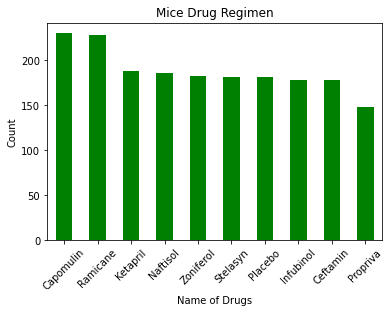

<Figure size 432x288 with 0 Axes>

In [81]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_Counts = cleaned_df["Drug Regimen"].value_counts()
#y values set to values of drug regimen 
y_axis = bar_Counts.values
#x values set to the index of drug regimens
x_axis = bar_Counts.index
#created bar graph, with lables, and titles, set to green color for personal visual preferance, and tick rotation at 45 for readability
bar_Counts.plot(kind = "bar", color= "green")
plt.ylabel("Count")
plt.xlabel("Name of Drugs")
plt.title("Mice Drug Regimen")
plt.xticks(rotation=45)
plt.show()
#saving chart to file
plt.savefig('Mice_Drug_Regimen_bargraph.png')

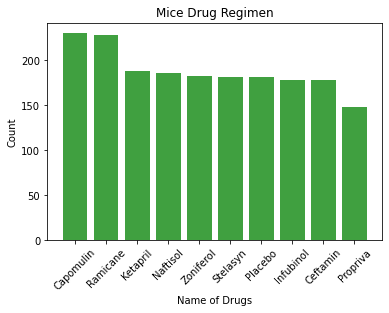

<Figure size 432x288 with 0 Axes>

In [82]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bar_Counts = cleaned_df["Drug Regimen"].value_counts()

x_axis = np.arange(0,len(y_axis))

#y values set to values of drug regimen 
y_axis = bar_Counts.values
#x values set to the index of drug regimens
x_value = bar_Counts.index

#created bar graph, with lables, and titles, set to green color for personal visual preferance, and tick rotation at 45 for readability
plt.bar(x_value, y_axis, facecolor="green", alpha=0.75, align="center")
plt.ylabel("Count")
plt.xlabel("Name of Drugs")
plt.title("Mice Drug Regimen")
plt.xticks(rotation=45)
plt.show()
#saving chart to file
plt.savefig('Mice_Drug_Regimen_bargraph_pyplot.png')

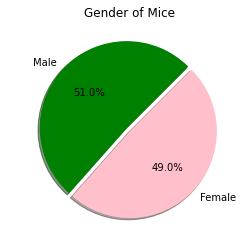

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaned_df["Sex"].value_counts()
#set the Percents of the each gender
gender_Percent = gender_count.values
#set explode to .05 to create small explode gap
gender_Explode = [0.05, 0]
#created labes for data group
gender_Labels = gender_count.index
#set colors to green and pink
gender_Colors = ["green", "pink"]
#set title
plt.title("Gender of Mice")
#created pie plot with variables above
gender_count.plot(kind= "pie", explode=gender_Explode, colors=gender_Colors, autopct="%1.1f%%",shadow=True, startangle=45 )
#got ride of the label that showed "sex"
plt.ylabel(" ")
#print plot
plt.show() 
#save to file
plt.savefig('Gender_of_Mice_Pie.png')

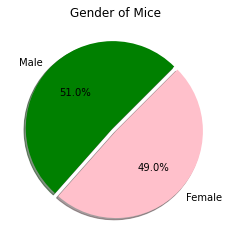

<Figure size 432x288 with 0 Axes>

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = cleaned_df["Sex"].value_counts()
#set the Percents of the each gender
gender_Percent = gender_count.values
#set explode to .05 to create small explode gap
gender_Explode = [0.05, 0]
#created labes for data group
gender_Labels = gender_count.index
#set colors to green and pink
gender_Colors = ["green", "pink"]
#set title
plt.title("Gender of Mice")
#created pie plot with variables above
plt.pie(gender_Percent, explode=gender_Explode, labels=gender_Labels, colors=gender_Colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
#print plot
plt.show()
#save to file
plt.savefig('Gender_of_Mice_Pie_pyplot.png')

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  # Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_Tumor_Volume = cleaned_df.groupby("Mouse ID").max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ftv_merged= final_Tumor_Volume[["Mouse ID", "Timepoint"]].merge(cleaned_df, on=["Mouse ID", "Timepoint"], how="left")
#rounded to 2 decimals
ftv_merged = ftv_merged.round(2)
#view data
ftv_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
# done exact same for each of the 4 medications chosen below

In [87]:
capomulin_df= ftv_merged.loc[ftv_merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
#set quartiles
cap_quartile= capomulin_df.quantile([.25,.5,.75])
#set lower quartile 
cap_lower= cap_quartile[.25]
#set upper quartile
cap_upper= cap_quartile[.75]
#set iqr using uper and lower 
cap_iqr= cap_upper-cap_lower
#calculations for lower and uper outlier information
cap_out_lower= (cap_lower-(1.5*cap_iqr))
cap_out_upper= cap_upper+(1.5*cap_iqr)
#out put outlier limits
print(f'Below : {round(cap_out_lower,2)} is an outlier')
print(f'Above : {round(cap_out_upper,2)} is an outlier')

Below : 20.71 is an outlier
Above : 51.83 is an outlier


In [88]:
ramicane_df= ftv_merged.loc[ftv_merged['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
#set quartiles
ram_quartile= ramicane_df.quantile([.25,.5,.75])
#set lower quartile 
ram_lower= ram_quartile[.25]
#set upper quartile
ram_upper= ram_quartile[.75]
#set iqr using uper and lower 
ram_iqr= ram_upper-ram_lower
#calculations for lower and uper outlier information
ram_out_lower= (ram_lower-(1.5*ram_iqr))
ram_out_upper= ram_upper+(1.5*ram_iqr)
#out put outlier limits
print(f'Below : {round(ram_out_lower,2)} is an outlier')
print(f'Above : {round(ram_out_upper,2)} is an outlier')

Below : 17.91 is an outlier
Above : 54.31 is an outlier


In [89]:
infubinol_df=ftv_merged.loc[ftv_merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
#set quartiles
inf_quartile= infubinol_df.quantile([.25,.5,.75])
#set lower quartile 
inf_lower= inf_quartile[.25]
#set upper quartile
inf_upper= inf_quartile[.75]
#set iqr using uper and lower
inf_iqr= inf_upper-inf_lower
#calculations for lower and uper outlier information
inf_out_lower= (inf_lower-(1.5*inf_iqr))
inf_out_upper= inf_upper+(1.5*inf_iqr)
#out put outlier limits
print(f'Below : {round(inf_out_lower,2)} is an outlier')
print(f'Above : {round(inf_out_upper,2)} is an outlier')

Below : 36.83 is an outlier
Above : 82.75 is an outlier


In [90]:
ceftamin_df= ftv_merged.loc[ftv_merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
#set quartiles
cef_quartile= ceftamin_df.quantile([.25,.5,.75])
#set lower quartile 
cef_lower= cef_quartile[.25]
#set upper quartile
cef_upper= cef_quartile[.75]
#set iqr using uper and lower
cef_iqr= cef_upper-cef_lower
#calculations for lower and uper outlier information
cef_out_lower= (cef_lower-(1.5*cef_iqr))
cef_out_upper= cef_upper+(1.5*cef_iqr)
#out put outlier limits
print(f'Below : {round(cef_out_lower,2)} is an outlier')
print(f'Above : {round(cef_out_upper,2)} is an outlier')


Below : 25.35 is an outlier
Above : 87.67 is an outlier


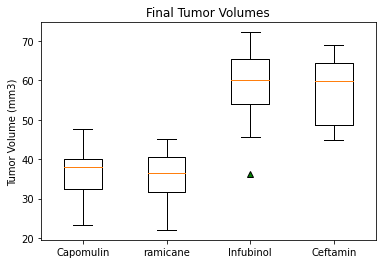

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#creating dict for flierprops
green_tri = dict(markerfacecolor='g', marker='^')
#setting subplots ( first try at this )
fig, ax = plt.subplots()
#setting title
ax.set_title('Final Tumor Volumes')
#setting y label
ax.set_ylabel("Tumor Volume (mm3)")
#creating boxplot using above variables
ax.boxplot([capomulin_df, ramicane_df, infubinol_df, ceftamin_df], labels=["Capomulin", "ramicane", "Infubinol", "Ceftamin"], flierprops=green_tri)
#saving plot to file
plt.savefig('Final_Tumor_Volume_BoxPlot.png')

## Line and Scatter Plots

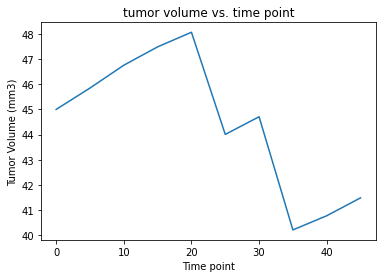

<Figure size 432x288 with 0 Axes>

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# setting specific Rat used
rat= cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509']
#plotting line graf of time pont vs tumor volume
plt.plot(rat["Timepoint"], rat["Tumor Volume (mm3)"])
#labels of x and y
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
#title
plt.title("tumor volume vs. time point")
#printing out the plot
plt.show()
#save file
plt.savefig('Tumor_Volume_Vs_Time_Line.png')

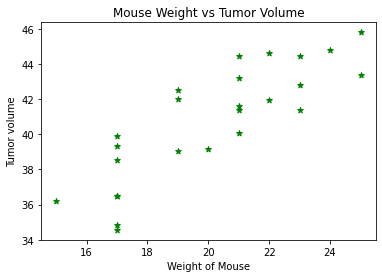

<Figure size 432x288 with 0 Axes>

In [93]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# using the drug regeimen capomulin
scatter_Capomulin= cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
#getting single mouse ID for the group 
scatter_mean= scatter_Capomulin.groupby(["Mouse ID"]).mean()
#setting up scatter plot with green stars
plt.scatter(scatter_mean["Weight (g)"],scatter_mean["Tumor Volume (mm3)"], c="g", marker="*")
#set title, and y, x labels
plt.title("Mouse Weight vs Tumor Volume")
plt.ylabel("Tumor volume")
plt.xlabel("Weight of Mouse")
#show plot
plt.show()
#save to file
plt.savefig('Weight_vs_Tumor_Volume_ scatter.png')

## Correlation and Regression

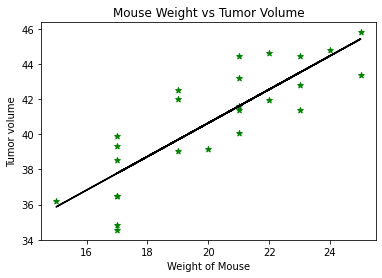

<Figure size 432x288 with 0 Axes>

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#followed linregress settup for weight and TVMM3
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_mean["Weight (g)"], scatter_mean["Tumor Volume (mm3)"])
#set regress value to formula
r_v= scatter_mean["Weight (g)"]* slope + intercept
#set up scatter plot 
plt.scatter(scatter_mean["Weight (g)"],scatter_mean["Tumor Volume (mm3)"], c="g", marker="*")
#ploted line based of mean weight, in black
plt.plot(scatter_mean["Weight (g)"], r_v, color='black')
#labes and title
plt.title("Mouse Weight vs Tumor Volume")
plt.ylabel("Tumor volume")
plt.xlabel("Weight of Mouse")
#show plot
plt.show()
#save file
plt.savefig('Weight_vs_Tumor_Volume_Correlation_Regression.png')